# Exercises XP

In [1]:
!pip install scikit-learn

In [2]:
# load necessary libraries
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

## 🌟 Exercise 1 : Understanding The Problem And Data Collection

We want to predict if an individual will have diabetes.

Load the diabetes dataset and explore it.
How many positive and negative cases is there ?
Split the data into training and testing sets

In [3]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.shape

(100000, 9)

In [5]:
# check missing values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
# check tipes of columns
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [7]:
# Counting how many rows are duplicated
df.duplicated().sum()

3854

In [8]:
# Getting the dataframe without duplicated rows
df = df.drop_duplicates()

In [9]:
# basic statistics
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


<Axes: xlabel='diabetes', ylabel='count'>

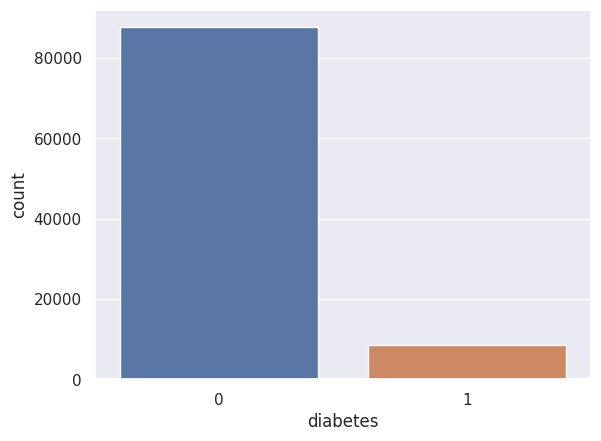

In [10]:
sns.countplot(x=df.diabetes)

In [11]:
df.groupby('diabetes').count()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,,,,,
0,87664,87664,87664,87664,87664,87664,87664,87664
1,8482,8482,8482,8482,8482,8482,8482,8482


In [34]:
# Split the data into features (X) and target variable (y)
data_features = df[['age', 'hypertension',	'heart_disease',	'bmi',	'HbA1c_level',	'blood_glucose_level']]
data_target = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, train_size=0.70, test_size=0.30, random_state=1)
print("Length of X_train is: {X_train}".format(X_train = len(X_train)))
print("Length of X_test is: {X_test}".format(X_test = len(X_test)))
print("Length of y_train is: {y_train}".format(y_train = len(y_train)))
print("Length of y_test is: {y_test}".format(y_test = len(y_test)))

Length of X_train is: 67302
Length of X_test is: 28844
Length of y_train is: 67302
Length of y_test is: 28844


## 🌟 Exercise 2 : Model Picking And Standardization

Which classification model can we use in this problem and why ?
Do we need to standardize the data ? If yes, use .StandardScaler()


For a diabetes prediction problem, we can use such various classification models, as:

- Logistic Regression: Logistic regression is a simple and interpretable model that works well when the relationship between features and the target variable is approximately linear. It's a good starting point for classification problems.

- Support Vector Machines (SVM): SVM is effective when the decision boundary is not necessarily linear. It can capture complex relationships in the data and is robust in high-dimensional spaces.

- Random Forest: Random Forest is an ensemble method that combines multiple decision trees. It is robust, handles non-linearity well, and provides feature importance scores.

In [35]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

🌟 Exercise 3 : Model Training

We will use, the logistic regression model, Train it.

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     26236
           1       0.87      0.63      0.73      2608

    accuracy                           0.96     28844
   macro avg       0.92      0.81      0.85     28844
weighted avg       0.96      0.96      0.95     28844



## 🌟 Exercise 4 : Evaluation Metrics

Plot the accuracy score and comment the results.
Plot the confusion matrix and comment the results.
Plot the Recall, precision, F1-score and comment the results.

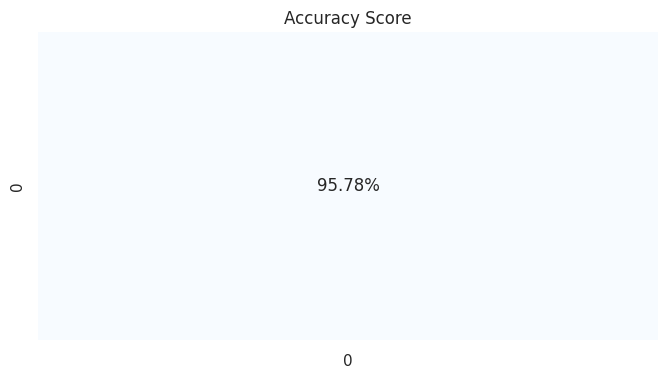

In [42]:
# Plot Accuracy Score
plt.figure(figsize=(8, 4))
sns.heatmap([[accuracy]], annot=True, fmt=".2%", cmap="Blues", cbar=False)
plt.title('Accuracy Score')
plt.show()

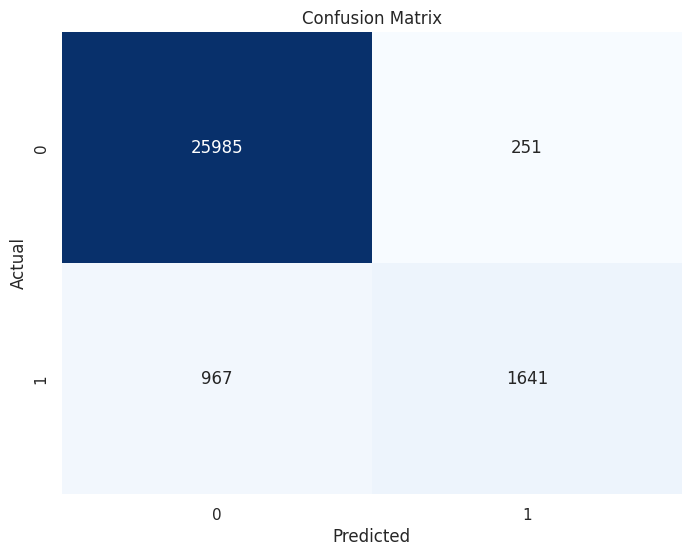

In [43]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- True Negative (Top-Left): 25985 no diabetes diagnoses were correctly predicted as no diabetes.
- False Negative (Bottom-Left): 967 diabetes diagnosis were incorrectly predicted as no diabetes (Type II error).
- True Positive (Bottom-Right): 1641 diabetes diagnosis were correctly identified as diabetes.
- False Positive (Top-Right): 251 no diabetes diagnoses were incorrectly identified as diabetes (Type I error).

In summary, our model has a high number of true negatives and a relatively low number of false positives and false negatives, which indicates it is quite good at identifying no diabetes diagnoses but may need improvement in correctly identifying diabetes diagnoses due to the number of false negatives.

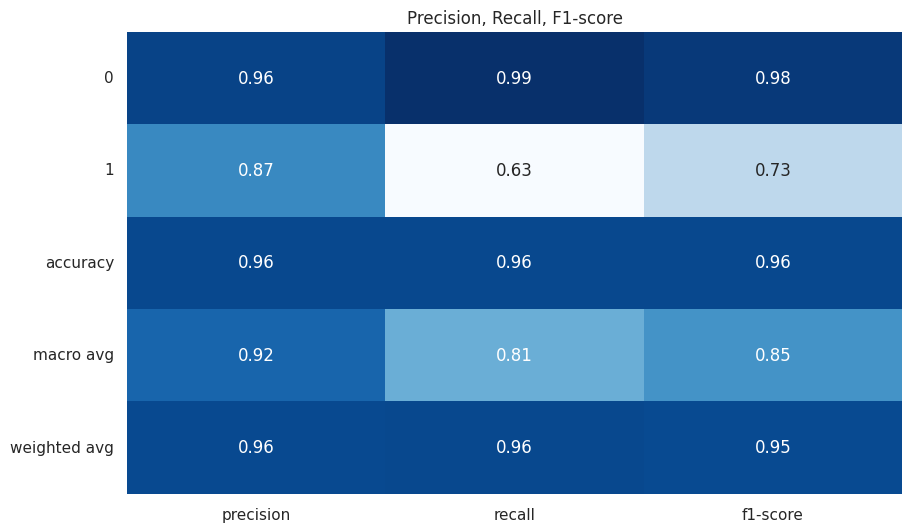

In [44]:
# Plot Recall, Precision, and F1-score
report_df = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_df).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df[['precision', 'recall', 'f1-score']], annot=True, cmap="Blues", cbar=False)
plt.title('Precision, Recall, F1-score')
plt.show()

The high overall accuracy indicates good performance, but it's essential to consider the imbalanced nature of the classes. The class imbalance is evident in the difference between precision and recall for class 1 (diabetic instances). The model is better at identifying non-diabetic instances (class 0) than diabetic instances (class 1).

In a medical context like diabetes prediction, missing a diabetic case (false negatives) might have more severe consequences than a false positive. Therefore, it might be crucial to prioritize improving recall for the diabetic class, even if it means accepting a lower precision.

🌟 Exercise 5 : Visualizing The Performance Of Our Model

Visualize the decision boundary with accuracy information.

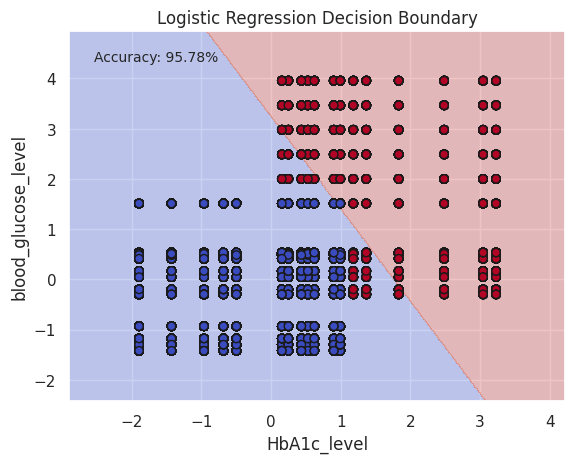

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X = df[['age', 'hypertension',	'heart_disease',	'bmi',	'HbA1c_level',	'blood_glucose_level']]
y = df['diabetes']
# Select the first two features for visualization
X_subset = X.iloc[:, 4:]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_subset)

# Fit a Logistic Regression model
model.fit(X_scaled, y)

# Create a meshgrid to plot the decision boundary
h = .02
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Perform predictions on the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

# Plot the data points
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

plt.title('Logistic Regression Decision Boundary')
plt.xlabel('HbA1c_level')
plt.ylabel('blood_glucose_level')

# Display accuracy information
plt.text(0.05, 0.95, f'Accuracy: {accuracy:.2%}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.show()


## 🌟 Exercise 6 : ROC Curve

Plot the ROC Curve

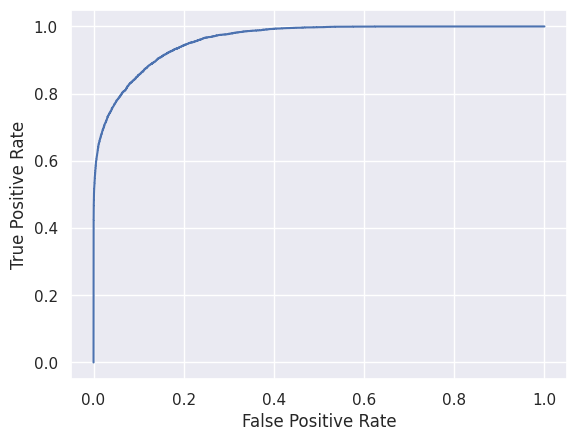

In [71]:
from sklearn import metrics
# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

#define metrics
y_pred_proba = model.predict_proba(X_train_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The more that the curve hugs the top left corner of the plot, the better the model does at classifying the data into categories.

As we can see from the plot above, this logistic regression model does a pretty good job of classifying the data into categories.